### Imports

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 1

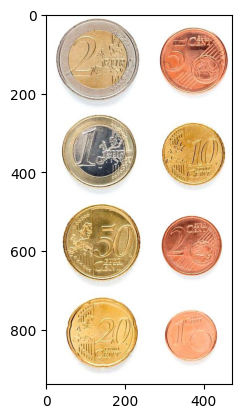

In [3]:
img = cv2.imread('Monedas.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

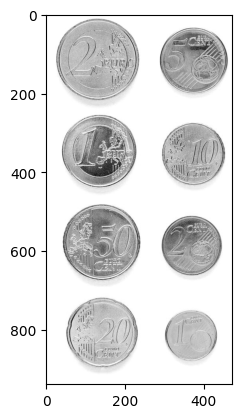

In [4]:
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gimg, cmap='gray')

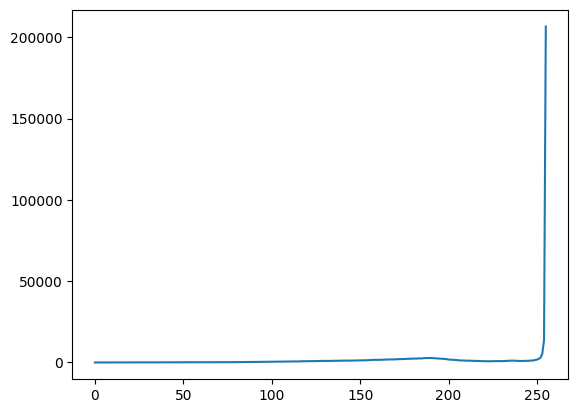

In [5]:
hist = cv2.calcHist([gimg], [0], None, [256], [0, 256])
plt.plot(hist)

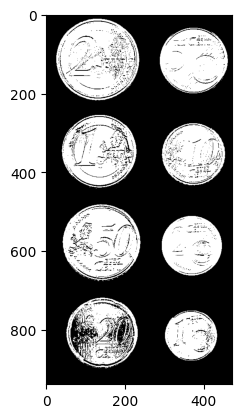

In [6]:
_, thimg = cv2.threshold(gimg, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thimg, cmap='gray')

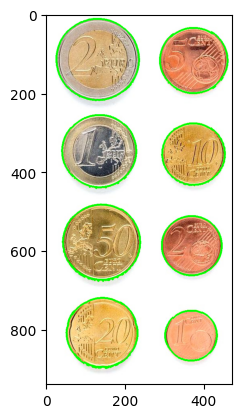

In [7]:
contours, hierarchy = cv2.findContours(thimg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(cv2.cvtColor(cv2.drawContours(img, contours, -1, (0, 255, 0), 3), cv2.COLOR_BGR2RGB))


In [54]:
coins_size = { # diametro (mm)
    .01: 16.26,
    .02: 18.75,
    .05: 21.25,
    .1: 19.75,
    .2: 22.25,
    .5: 24.25,
    1: 23.25,
    2: 25.75
}

SIZE_GAP = .04
CTRL_COIN = 1

click_pos = None

def click(event, x, y, flags, params):
    global click_pos
    if event == cv2.EVENT_LBUTTONUP:
        print((x,y))
        click_pos = (x, y)
        

def test_pos(pos, contours):
    global ctrl_cont
    for c in contours:
        if cv2.pointPolygonTest(c, pos, False) >=0:
           ctrl_cont = c
           return True
    return False


while click_pos == None or not test_pos(click_pos, contours):
    cv2.namedWindow("Monedas")
    cv2.setMouseCallback('Monedas', click)
    while True:
        cv2.imshow('Monedas', cv2.drawContours(img, contours, -1, (0, 255, 0), 3))
        if cv2.waitKey(0) & 0xFF == 27: break

    cv2.destroyAllWindows()
    cv2.waitKey(1)


_, ctrl_rad = cv2.minEnclosingCircle(ctrl_cont)

summ = 0
kprop = coins_size[CTRL_COIN]/ctrl_rad

for c in contours:
    if cv2.contourArea(c) > 10:
        _, radius = cv2.minEnclosingCircle(c)
        
        for item in coins_size.items():
            if item[1]*(1-SIZE_GAP) <= radius*kprop <= item[1]*(1+SIZE_GAP):
                summ+=item[0]
                break

print(f'Valor final: {summ}')

(137, 367)
16.24666555763644
22.356761394374228
18.814413654341283
24.248800582593265
19.737400071839883
23.25
21.199755340964824
25.98704731273632
Valor final: 3.88
